#### Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas
import geoplot

df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/earthquakes/earthquakes.csv')
dfm = df.sort_values('impact.magnitude',ascending=True)
dfmr = df.sort_values('impact.magnitude',ascending=False)

path = geopandas.datasets.get_path('naturalearth_lowres')
dfg = geopandas.read_file(path)

dfplates=pd.read_csv('tectonic-plates.csv')
dfplatesNames = list(set(dfplates['plate']))
dfcoords = [
    dfplates.loc[dfplates['plate']==pn].values[:,1:3] for pn in dfplatesNames
];


### Let's plot earthquakes by their latitude and longitude

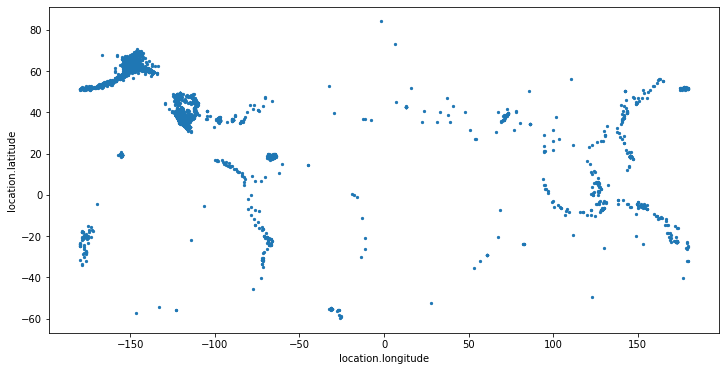

In [8]:
df.plot.scatter(x='location.longitude',y='location.latitude',figsize=(12,6), s=5);

### Let's put it over a map of the world

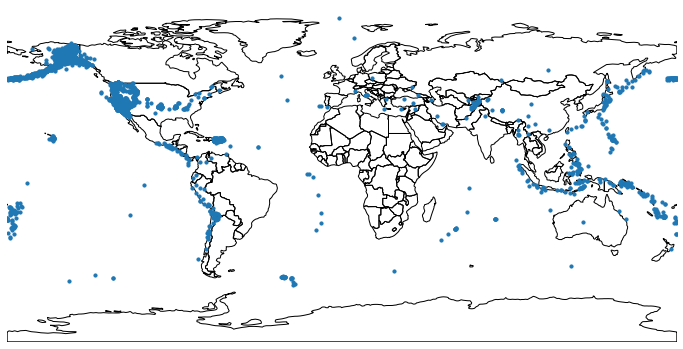

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df['location.longitude'],df['location.latitude'], s=10);
geoplot.polyplot(dfg, ax=ax);

#### What are some places that have lots of earthquakes?

Northwest united states, alaska, japan, hawaii

#### Which place has the biggest earthquakes?

We can't tell from this picture.

### Let's visualize how strong they were

#### What are some ways to show how strong each earthquake was?

Put numbers by the dots.  Use different colors.  Use bigger dots for the stronger ones.

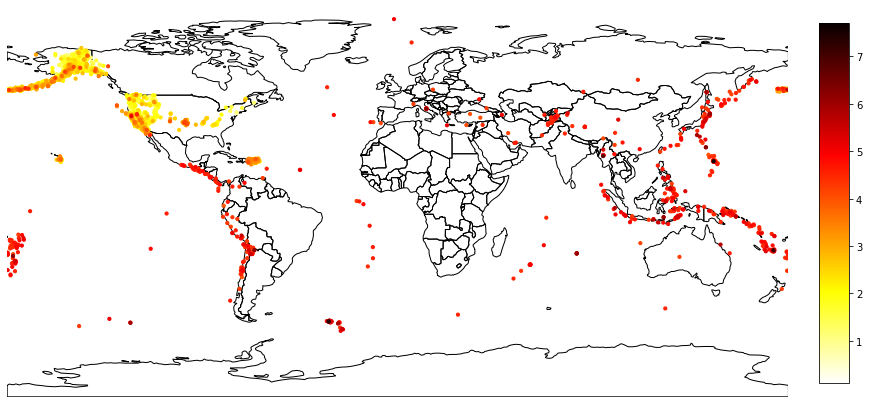

In [4]:
def plotWithColors():
    fig0, ax0 = plt.subplots(figsize=(14,10))
    data = [np.arange(max(df['impact.magnitude']), 0, -.1)]
    im = ax0.imshow(data, cmap='hot_r')
    plt.close(1)
    dfm = df.sort_values('impact.magnitude')
    fig, ax = plt.subplots(figsize=(14,10))
    ax.scatter(dfm['location.longitude'],dfm['location.latitude'],c=dfm['impact.magnitude'], s=10, cmap='hot_r');
    geoplot.polyplot(dfg, ax=ax);
    cax = fig.add_axes([.93, 0.25, 0.03, 0.5])
    fig.colorbar(im,cax=cax);
plotWithColors()

It's still a little hard to see the strong dots because there are so many weak ones, and the dark color matches the map lines.

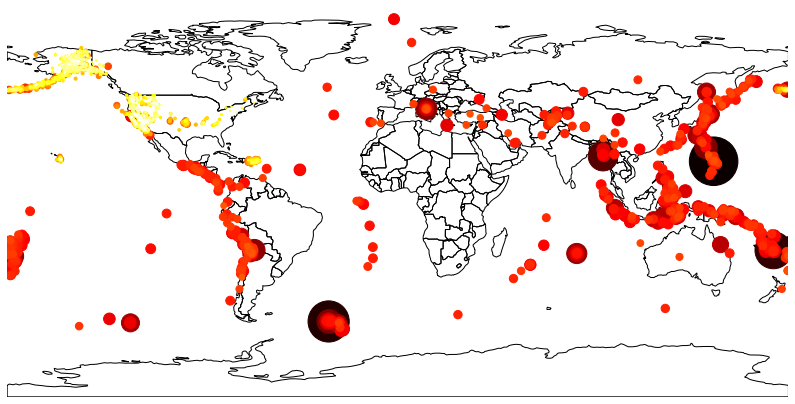

In [5]:
def plotWithSizes():
    fig, ax = plt.subplots(figsize=(14,10))
    ax.scatter(dfmr['location.longitude'],dfmr['location.latitude'], cmap='hot_r',
           s=.5*3**dfmr['impact.magnitude'], c=dfmr['impact.magnitude']);
    geoplot.polyplot(dfg, ax=ax);
plotWithSizes()

#### The points are definitely clustered in certain places.  Why is that?  What causes an earthquake?

They are caused by tectonic plates rubbing or bumping, so they will cluster along the edges of the plates.

#### Tectonic plate boundaries

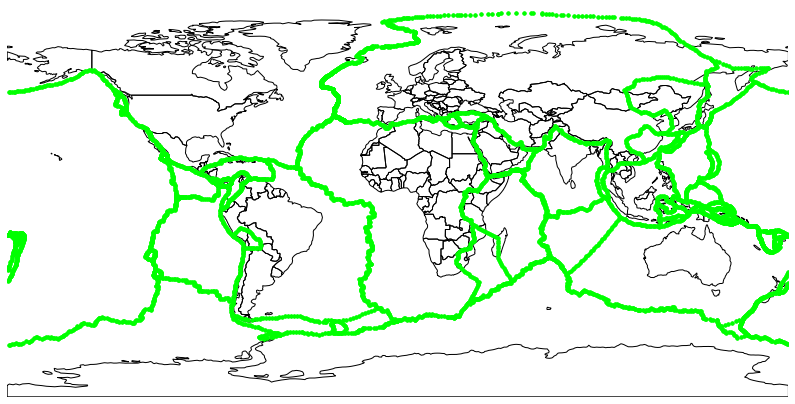

In [6]:
def plotWithBoundaries():
    fig, ax = plt.subplots(figsize=(14,10))
    for coords in dfcoords:
        ax.scatter(coords[:,1],coords[:,0],c='lime',s=10);
    geoplot.polyplot(dfg, ax=ax);
plotWithBoundaries()

### Now let's add back the earthquake locations

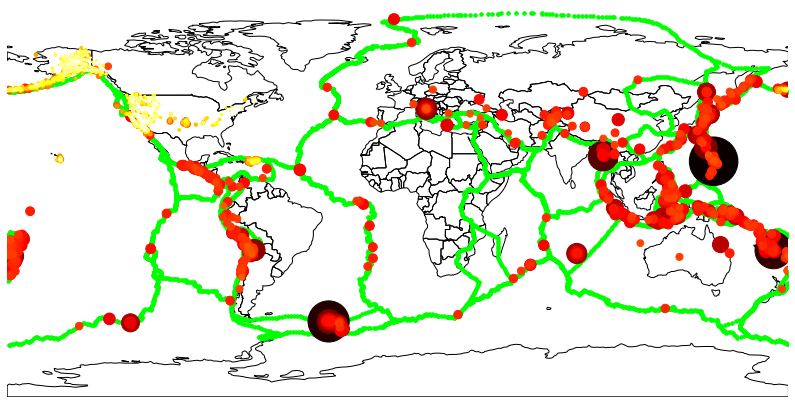

In [7]:
def plotEverything():
    fig, ax = plt.subplots(figsize=(14,10))
    for coords in dfcoords:
        ax.scatter(coords[:,1],coords[:,0],c='lime',s=10);
    ax.scatter(dfmr['location.longitude'],dfmr['location.latitude'], cmap='hot_r',
           s=.5*3**dfmr['impact.magnitude'], c=dfmr['impact.magnitude']);
    geoplot.polyplot(dfg, ax=ax);
plotEverything()

Most of them are right on the plate boundaries!